<a href="https://colab.research.google.com/github/sachin7474/Marketing_Campaign_for_Banking_Products_IS_project/blob/main/Marketing_Campaign_for_Banking_Products_IS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.1 Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.2 Importing the dataset

In [ ]:
from google.colab import files    #Uploading the exel file .
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1.xlsx


In [ ]:
 data=pd.read_excel('/content/Bank_Personal_Loan_Modelling 1.xlsx')

In [ ]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


1.3  Checking the type of data ,shape etc.

In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.shape

(5000, 14)

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Null values are not available in data

2. Dropping irrelevent columns

In [ ]:
#checking the correlation in 'age' and 'experience' columns
experience=data['Experience']
age=data['Age']
correaltion=experience.corr(age)
correaltion

0.9942148569683321

We will drop the ID column as it seems to be noisy data and Experience column as well beacause Age and Experience are highly correalted

In [ ]:
data=data.drop(['Experience','ID'],axis=1 )

In [ ]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.shape

(5000, 12)

In [ ]:
#checking for duplicated rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows ", duplicate_rows)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


  3.EDA: Study of the data distribution in each attribute and target variable

In [ ]:
#Number of unique in each column
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

column ZIPCode is a normal variable and have 467 distinct values ,so it will be better idea to drop ZIPCode from data

In [ ]:
data=data.drop(['ZIP Code'],axis=1)

In [ ]:
data.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Number of people with zero mortgage 
data[data['Mortgage']==0]['Mortgage'].count()

3462

In [ ]:
#number of people with  zero credit card spending per month
data[data['CCAvg']==0]['CCAvg'].count()

106

3.4 Value counts of all categorical columns.


In [ ]:
#value count of Family coloumn
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#value count of Education coloumn
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#value count of Personal loan  coloumn
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
#value count of Securities Account  coloumn
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#value count of  CD Account coloumn
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
#value count of Online coloumn
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

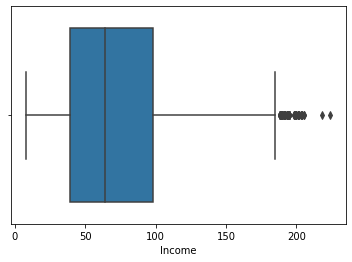

In [ ]:
sns.boxplot(x=data['Income'])

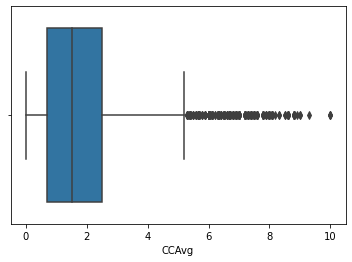

In [ ]:
sns.boxplot(x=data['CCAvg'])

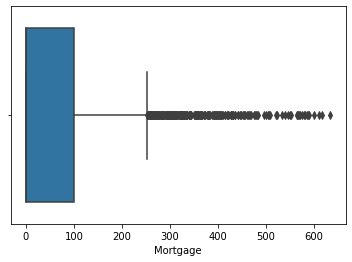

In [ ]:
sns.boxplot(x=data['Mortgage'])

After analysing above visulization it seems that outliers are present in the data

3.5 Univariate Analysis

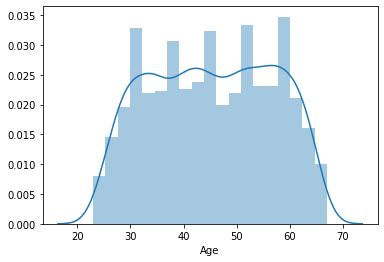

In [ ]:
sns.distplot(data.Age)
#Age is symmetricaly dstributed

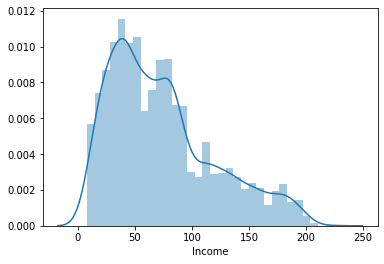

In [ ]:
sns.distplot(data.Income)   #Distribution is skewed

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f7d2d1c95f8>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f7d2d1c9d68>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f7d2d1c95c0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f7d2d37e048>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f7d2d1c9ac8>}

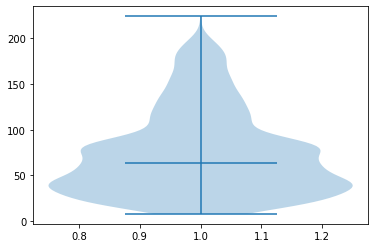

In [ ]:
plt.violinplot(data.Income,showmedians=True)

 Distribution in Income is right skewed

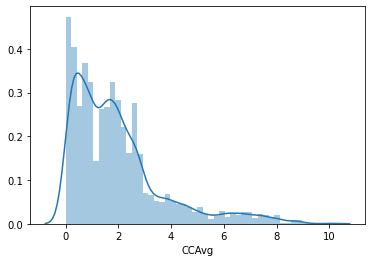

In [ ]:
sns.distplot(data.CCAvg)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f7d2ca91f98>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f7d2caa1748>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f7d2ca91f60>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f7d2caa19e8>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f7d2caa14a8>}

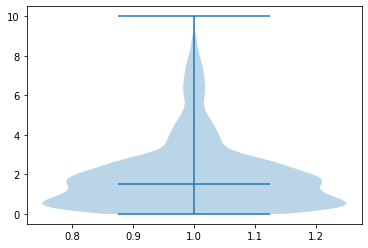

In [ ]:
plt.violinplot(data.CCAvg,showmedians=True)

Data in Income and Credit card is right skewed.

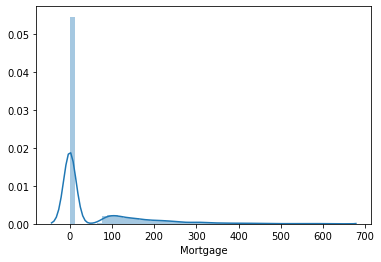

In [ ]:
sns.distplot(data.Mortgage)

 Mortgage column is highly skewed.

Pie chart foe personal Loan

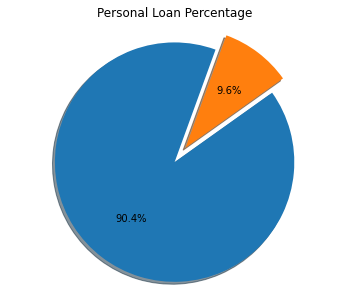

In [ ]:
tempdata=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
tempdata.columns=["Labels","Personal Loan"]
fig1,ax1= plt.subplots(figsize=(6,5))
explode =(0,0.15)
ax1.pie(tempdata['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

There are 9.6% customers in data who are accepting the loan

3.5 Multivariate Analysis

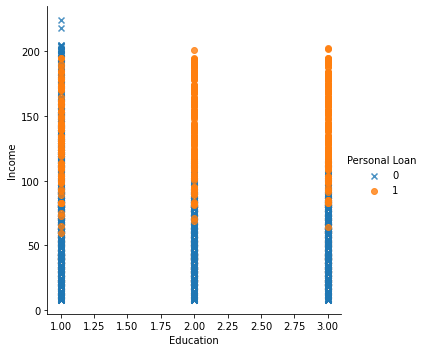

In [ ]:
sns.lmplot(x='Education', y='Income', hue='Personal Loan', 
           markers=['x', 'o'],
           fit_reg=False, data=data)

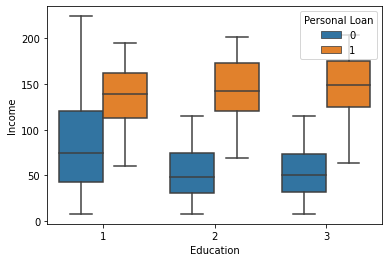

In [ ]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=data);

Analysing above visuliztion it is concluded that customers   having higher income and education have more chances to accept the loan.

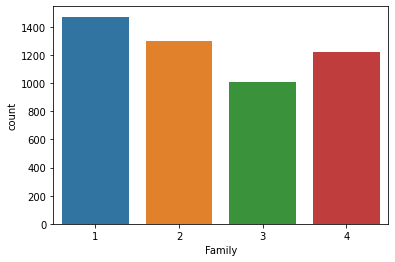

In [ ]:
sns.countplot(data.Family)

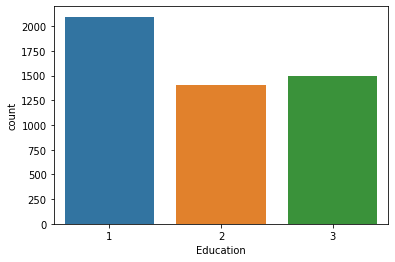

In [ ]:
sns.countplot(data.Education)

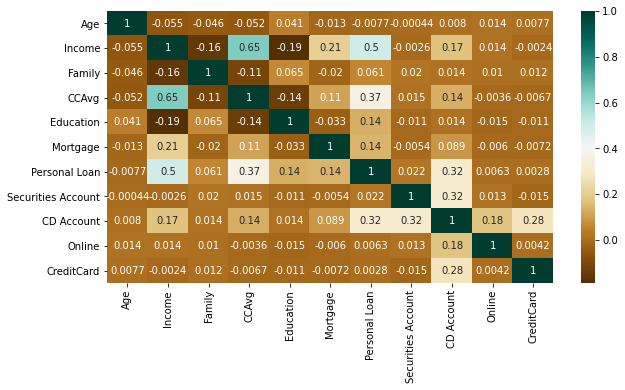

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap="BrBG",annot=True)

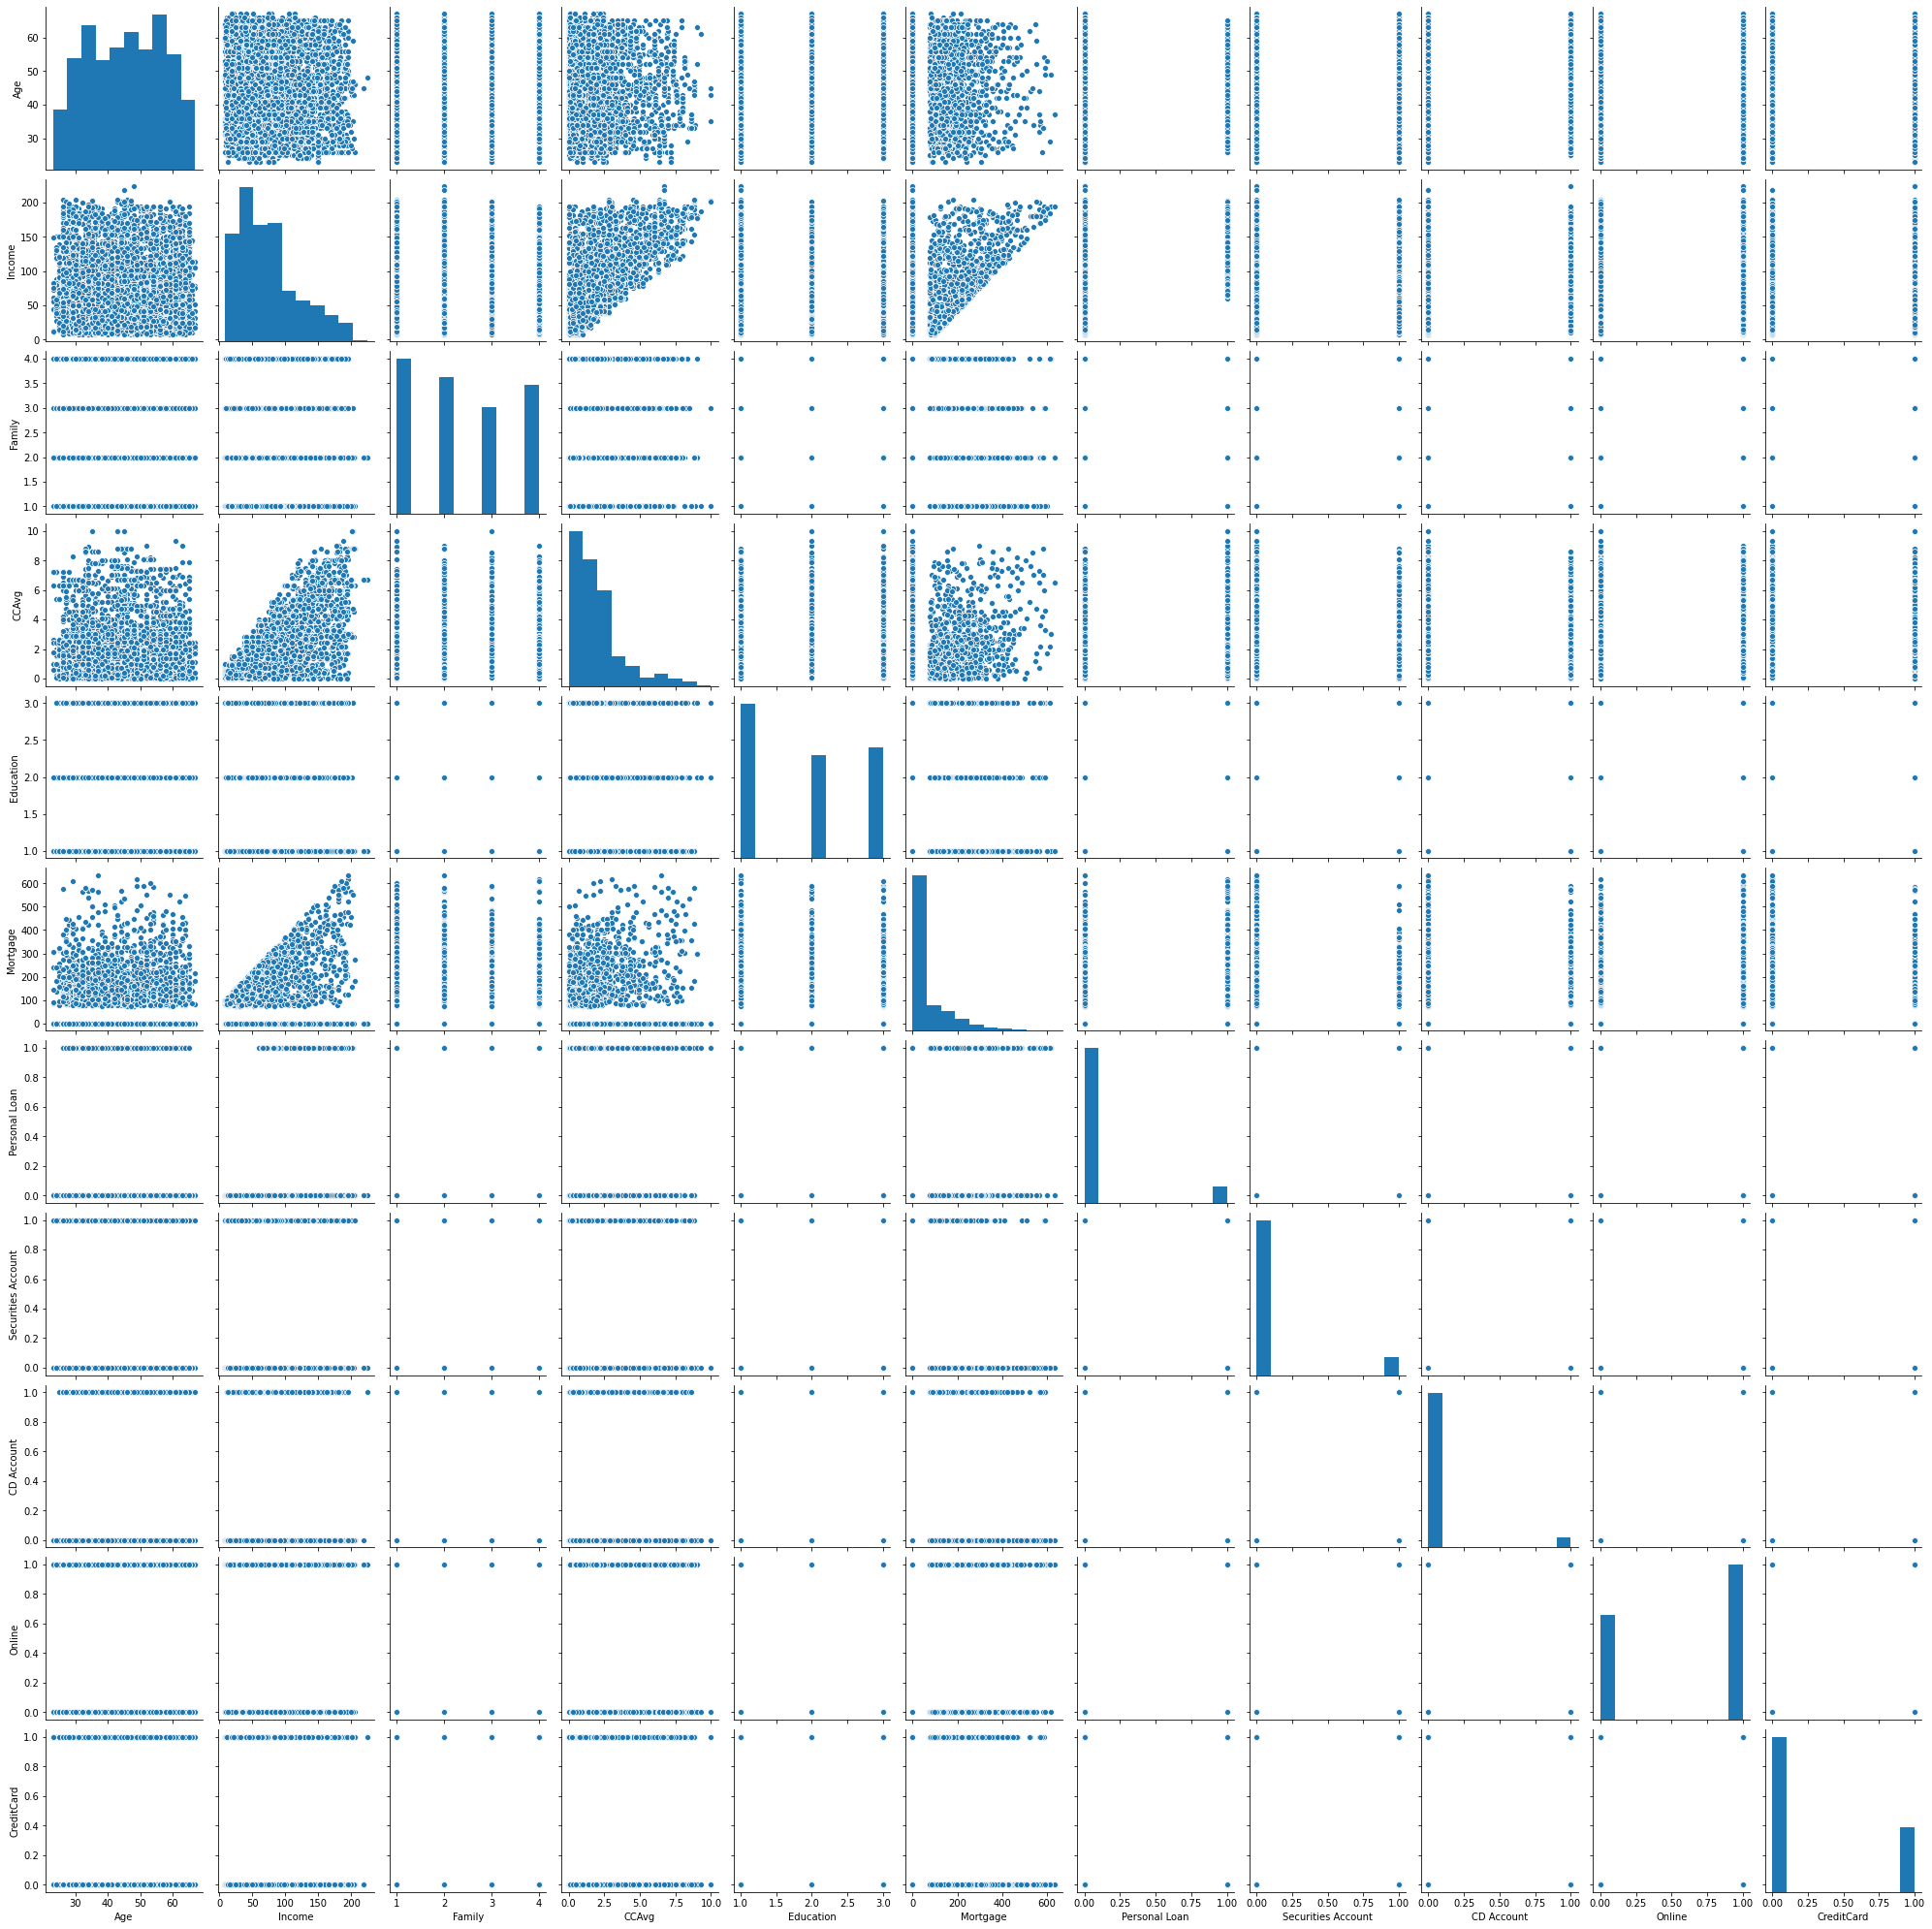

In [ ]:
sns.pairplot(data)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.shape

(5000, 11)

4 .Applying transformtion for feature variables

Here i am applying power transformation using boxcox method to reduce skewness of the income column data.

In [ ]:
from sklearn.preprocessing import PowerTransformer    #importing powertransformer
pt= PowerTransformer(method="box-cox",standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
data['Income']=pt.transform(data['Income'].values.reshape(-1,1))

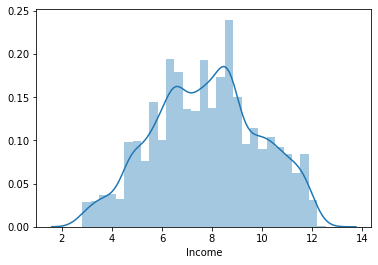

In [ ]:
sns.distplot(data.Income);

Now Income column seems to be symmetricaly dstributed

Here i am applying power transformation using yeo-johnson method to reduce skewness of the CCAvg column .

In [ ]:
pt= PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data['CCAvg'].values.reshape(-1,1))
data['CCAvg']=pt.transform(data['CCAvg'].values.reshape(-1,1))

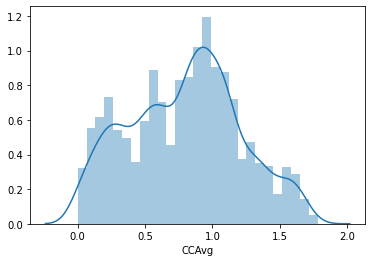

In [ ]:
sns.distplot(data.CCAvg);

Now CCAvg column seems to be symmetricaly dstributed

Applying binning in Mortgage 

In [ ]:
data['Mortgage_int']=pd.cut(data["Mortgage"],bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data.drop("Mortgage",axis=1,inplace=True)
                                                

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,6.994487,4,0.845150,1,0,1,0,0,0,0
1,45,5.974230,3,0.814468,1,0,1,0,0,0,0
2,39,3.402765,1,0.633771,1,0,0,0,0,0,0
3,35,9.309254,1,1.107409,2,0,0,0,0,0,0
4,35,6.747451,4,0.633771,2,0,0,0,0,1,0


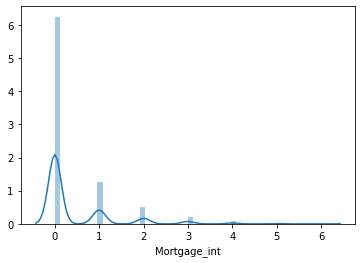

In [ ]:
sns.distplot(data.Mortgage_int);

After applying Transformation on above feature variables data seems to be symmetrically distributed

5.Normalising the data and spliting the data into training and test set

Scaling the data using min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler  #Importing the minmax scaler

In [ ]:
variables_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education',]

for column in variables_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
data.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,0.045455,0.430005,1.000000,0.474877,0.0,0,1,0,0,0,0
1,0.500000,0.325137,0.666667,0.457638,0.0,0,1,0,0,0,0
2,0.363636,0.060830,0.000000,0.356107,0.0,0,0,0,0,0,0
3,0.272727,0.667928,0.000000,0.622236,0.5,0,0,0,0,0,0
4,0.272727,0.404613,1.000000,0.356107,0.5,0,0,0,0,1,0


5.Spliting the data into training and test set

In [ ]:
X = data.drop(['Personal Loan'], axis=1)
Y = data['Personal Loan'].values

X.shape, Y.shape

((5000, 10), (5000,))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=17)

In [ ]:
print(train_X.shape,test_X.shape,train_Y.shape,test_Y.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


    Now Data is splitted in test and train data in 30:70 ratio respectively, 

6. Logistic Regression model to predict the likelihood of a customer buying
personal loans.

In [ ]:
from sklearn.linear_model import LogisticRegression #importing Logisting regression

Fitting model using logistic regression

In [ ]:
log_reg_model=LogisticRegression()
log_reg_model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now model is fitted using logistic regression algorithm,further I will do all metrics related operation to evaluate model performance

7.evaluating the model performance

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [ ]:
class_names = ['wont take loan', 'take loan']

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.9
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

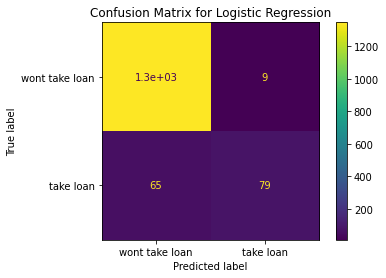

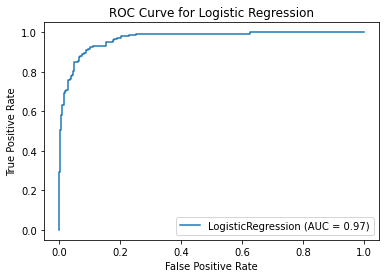

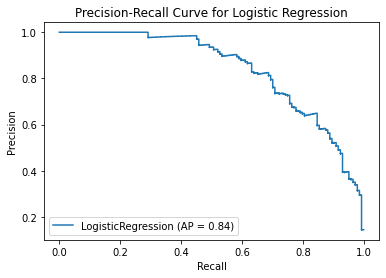

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg_model.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg_model.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg_model.predict(test_X)

precision_logi = precision_score(test_Y, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_Y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg_model, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg_model, test_X, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg_model, test_X, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')

Logistic regression results:
   we got training accuracy  0.95 and testing accuracy 0.95 

8.Building various other classification algorithms

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #Importing random forest classifier

In [ ]:
random_cf_model = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
random_cf_model.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Now model is fitted using RandomForestClassifier algorithm

Evaluating the model performance

RANDOM FOREST RESULT: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.96
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Curve for RandomForestClassifier')

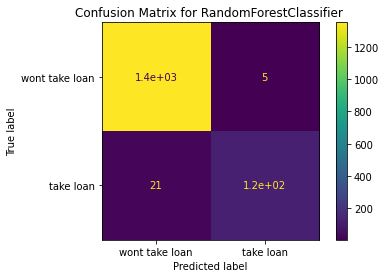

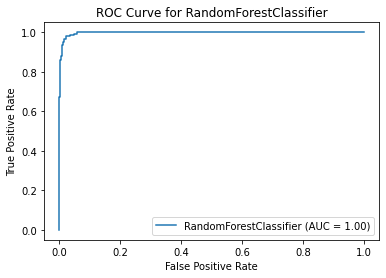

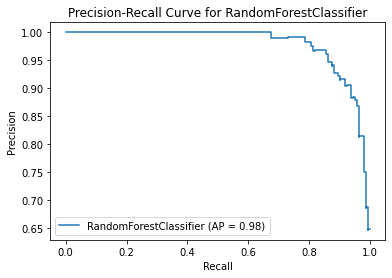

In [ ]:
print('RANDOM FOREST RESULT: ')

train_score = random_cf_model.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = random_cf_model.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = random_cf_model.predict(test_X)

precision_rf = precision_score(test_Y, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_Y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(random_cf_model, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for RandomForestClassifier ')

plot_roc_curve(random_cf_model, test_X, test_Y)
plt.title('ROC Curve for RandomForestClassifier')

plot_precision_recall_curve(random_cf_model, test_X, test_Y)
plt.title('Precision-Recall Curve for RandomForestClassifier')

RandomForestClassifier results: we got training accuracy 0.99 and testing accuracy 0.98,  Precision: 0.96 ,  Recall: 0.85




DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtf_model = DecisionTreeClassifier(random_state=17,max_depth=7)

In [ ]:
dtf_model.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

Evaluating the model performance

DecisionTreeClassifier: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.94
Recall: 0.85


Text(0.5, 1.0, 'Precision-Recall Curve for RandomForestClassifier')

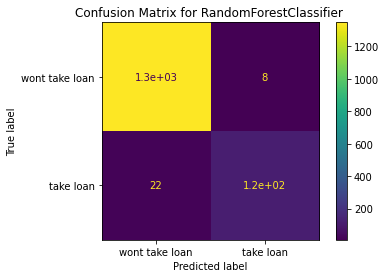

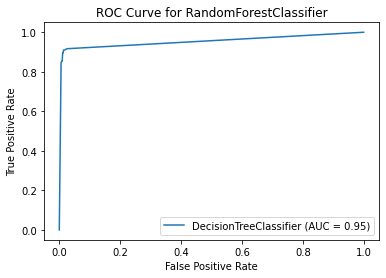

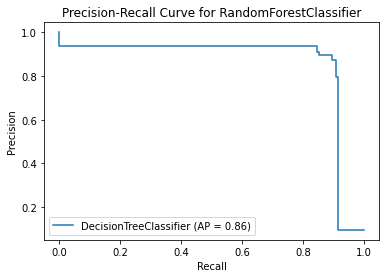

In [ ]:
print('DecisionTreeClassifier: ')

train_score = dtf_model.score(train_X, train_Y)
print('Training Accuracy:', train_score.round(2))
test_score = dtf_model.score(test_X, test_Y)
print('Testing Accuracy:', test_score.round(2))

y_pred_dtf = dtf_model.predict(test_X)

precision_dtf = precision_score(test_Y, y_pred_dtf, labels=class_names).round(2)
print('Precision:', precision_dtf)
recall_dtf = recall_score(test_Y, y_pred_dtf).round(2)
print('Recall:', recall_dtf)

plot_confusion_matrix(dtf_model, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for RandomForestClassifier ')

plot_roc_curve(dtf_model, test_X, test_Y)
plt.title('ROC Curve for RandomForestClassifier')

plot_precision_recall_curve(dtf_model, test_X, test_Y)
plt.title('Precision-Recall Curve for RandomForestClassifier')

DecisionTreeClassifier results: we got training accuracy 0.99 and testing accuracy 0.98,  Precision: 0.52 

Conclusion:

best performing model : RandomForestClassifier 

Comparing above models I found that the best performing model is RandomForestClassifier as it got training accuracy 0.99 and testing accuracy 0.98, Precision: 0.96 , Recall: 0.85.

9.business understanding of the model

1, In Step 1 we analysed the data ,Number of customers,Null values,Value counts etc

2 .we cleaned the data as we have drpped the ID,Experience,ZIP code as they are not affecting our model or were creating noise

3 we did EDA of the data as it helped us to know what tranformation or scaling we need to do with the data

4.Tranformed the data to remove skewness in the data

5.Normalised the data and splitted the data to build tje model

6.Build the models  and evaluted their performence

7.Compared the performance and found  Random forest model best performing model

Conclusion

this model will reduce the cost and time of bank for marketing thier loan plans as we have predicted that which customers are most likely to accept the offer